### Telco Customer Churn - Sci Learn <br> Naive Bayes

In [21]:
%matplotlib inline

import os
import sys
import json

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from IPython.display import display
import seaborn as sns
sns.set()

# Naive Bayes from - Sci Learn 
from sklearn.naive_bayes import BernoulliNB

# LIME library
import lime
import lime.lime_tabular


# Split data for testing
from sklearn.model_selection import train_test_split

# Add our local functions to the path
sys.path.append(os.path.join(os.pardir, 'src'))

# from models import evaluation
from models import evaluation

ALGORITHM_NAME = 'nb'
COUNTRY = 'mwi'

In [22]:
# Change the default directory
os.chdir('/home/mike/Documents/mkp_code/Institute of Data Course/telco-customer-churn-project/data/processed')

In [23]:
# Upload Customer Churn data to dataframe
customer_data = pd.read_csv('Telco-Customer-Churn-Processed.csv')

In [24]:
# Drop Unnamed: 0 - This column is not needed
customer_data.drop('Unnamed: 0',axis=1,inplace=True)

In [25]:
# Divide the variables from the target column
target_col = ['Churn']

# Remove the target column
categorical_cols = customer_data.columns
categorical_cols = [col for col in categorical_cols if col not in target_col]

In [26]:
# Variables to a dataframe for processing
x= customer_data[categorical_cols]

In [27]:
# select y = Target Column - Churn
y = customer_data.Churn

In [28]:
# Partition the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [29]:
# Fit the model
model = BernoulliNB()
%time model.fit(x_train, y_train)

CPU times: user 4.64 ms, sys: 55 µs, total: 4.69 ms
Wall time: 9.12 ms


BernoulliNB()

In [30]:
# Get an initial score
%time score = model.score(x_train, y_train)
print("In-sample score: {:0.2%}".format(score))

CPU times: user 3.55 ms, sys: 0 ns, total: 3.55 ms
Wall time: 7.64 ms
In-sample score: 75.31%


In [31]:
# Run the model
y_pred = model.predict(x_train)
y_prob = model.predict_proba(x_train)[:,1]

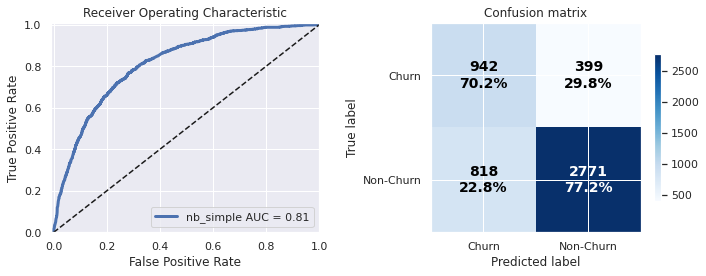

,nb_simple
accuracy,0.753144
recall,0.702461
precision,0.535227
f1,0.607546
cross_entropy,0.762272
roc_auc,0.813582
cohen_kappa,0.432245


In [32]:
# Evaluate performance and store model
metrics = evaluation.evaluate_model(y_train, y_pred, y_prob, 
                                    compare_models=None,
                                    store_model=False,
                                    model_name='simple', 
                                    prefix=ALGORITHM_NAME,
                                    country=COUNTRY,
                                    model=model, 
                                    features=x_train.columns.values)

In [33]:
# Fit the model
model = BernoulliNB()
%time model.fit(x_test, y_test)

CPU times: user 3.8 ms, sys: 6 µs, total: 3.81 ms
Wall time: 8.6 ms


BernoulliNB()

In [34]:
# Get an initial score
%time score = model.score(x_test, y_test)
print("In-sample score: {:0.2%}".format(score))

CPU times: user 2.72 ms, sys: 48 µs, total: 2.77 ms
Wall time: 5.63 ms
In-sample score: 77.05%


In [35]:
# Run the model
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:,1]

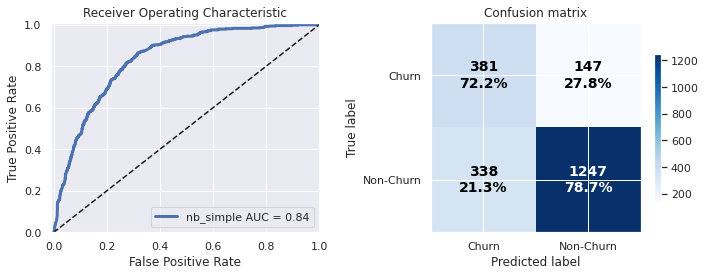

,nb_simple
accuracy,0.770469
recall,0.721591
precision,0.529903
f1,0.611067
cross_entropy,0.750443
roc_auc,0.837809
cohen_kappa,0.453626


In [36]:
# Evaluate performance and store model
metrics = evaluation.evaluate_model(y_test, y_pred, y_prob, 
                                    compare_models=None,
                                    store_model=False,
                                    model_name='simple', 
                                    prefix=ALGORITHM_NAME,
                                    country=COUNTRY,
                                    model=model, 
                                    features=x_test.columns.values)

In [37]:
categorical_cols = x_train.values

In [39]:
# LIME has one explainer for all models 
explainer = lime.lime_tabular.LimeTabularExplainer(x_train.values,          feature_names=x_train.columns.values.tolist(),                          class_names=['Churn'],                             categorical_features=categorical_cols,verbose=True, mode='naivebayes')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()